
# Purpose: Hypothesis Testing
# Author: Na Qian



# Import necessary packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
sns.set_style('whitegrid')

# Explore SFO data

# Acquire data 

In [2]:
data_path_sfo="https://docs.google.com/spreadsheets/d/e/2PACX-1vRq8NyI_2-froZYCAP7TiMnXuC3PgdNuVDtaC1edLaWTTnycEICe8dFSwtfDRMIIdVUPVdBswjtEfSk/pub?gid=109122768&single=true&output=csv"

In [3]:
df_sfo = pd.read_csv(data_path_sfo)

In [4]:
df_sfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    103 non-null    object 
 1   SFO - Avg. Daily Miles Driven Per Hour  103 non-null    float64
 2   Marketing_Campaign                      103 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [26]:
df_sfo.head(5)

,Date,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
0,09/14/2019,47.307253,0
1,09/15/2019,93.586931,0
2,09/16/2019,38.644196,0
3,09/17/2019,40.674907,0
4,09/18/2019,63.256596,0


# Column list

Date - The date that the observation was recorded.

SFO - Avg. Daily Miles Driven Per Hour - the daily average mileage a diver dirve per hour in SFO.

Marketing_Campaign - A binary field that is set to either 1 for when there has campaign or 0 for when there has no campaign.

# Describe quantitative variable

In [6]:
df_sfo['SFO - Avg. Daily Miles Driven Per Hour'].describe()

count    103.000000
mean      61.333422
std       33.381028
min        2.216110
25%       40.245369
50%       66.652899
75%       86.002087
max      125.595790
Name: SFO - Avg. Daily Miles Driven Per Hour, dtype: float64

# Graphical Portion

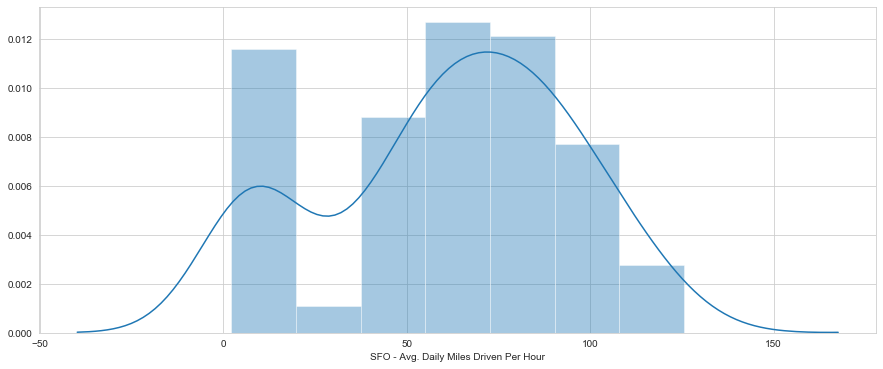

In [7]:
sns.distplot(df_sfo['SFO - Avg. Daily Miles Driven Per Hour'])

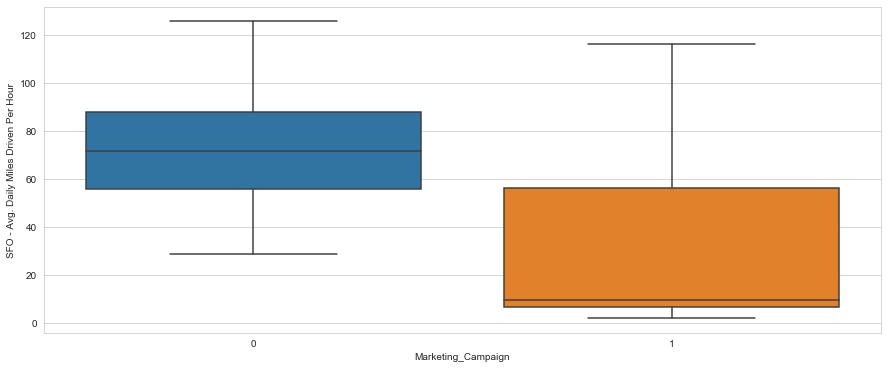

In [12]:
sns.boxplot(x="Marketing_Campaign",y="SFO - Avg. Daily Miles Driven Per Hour",data=df_sfo)


# Test Setup:

The Null Hypothesis is that the daily average mileage a diver dirve per hour in SFO when there has campaign is same as there has no campaign 

The Alternate Hypothesis is that the daily average mileage a diver dirve per hour in SFO when there has campaign is greater than there has no campaign 

The level of significance will be set to 0.05

# Quantitative Variable Overview

In [9]:
df_sfo.describe()

,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,61.333422,0.281553
std,33.381028,0.451956
min,2.216110,0.000000
25%,40.245369,0.000000
50%,66.652899,0.000000
75%,86.002087,1.000000
max,125.595790,1.000000


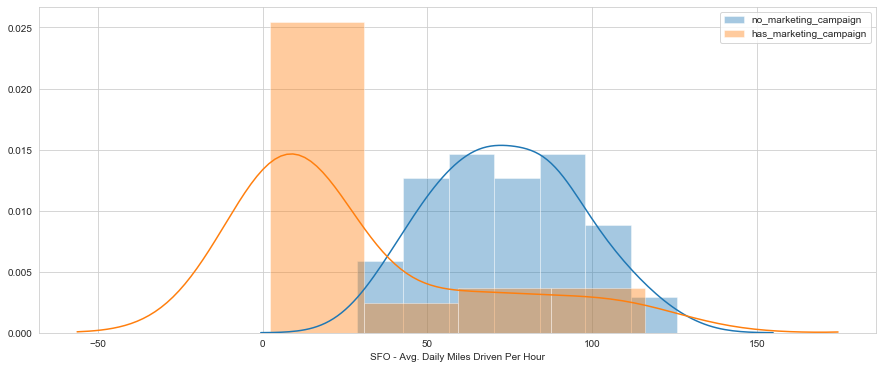

In [10]:
data_sfo_0 = df_sfo['SFO - Avg. Daily Miles Driven Per Hour'].loc[df_sfo['Marketing_Campaign']==0]
data_sfo_1 = df_sfo['SFO - Avg. Daily Miles Driven Per Hour'].loc[df_sfo['Marketing_Campaign']==1]
sns.distplot(data_sfo_0)
sns.distplot(data_sfo_1)
plt.legend(['no_marketing_campaign','has_marketing_campaign'])

In [13]:
#compare samples
stat, p = f_oneway(data_sfo_0, data_sfo_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=60.124, p=0.000
Different distributions (reject H0)


# Explore LAX data

In [14]:
data_path_lax="https://docs.google.com/spreadsheets/d/e/2PACX-1vTQxXrChkUMyoaIcn6F-YIPyvmM8KoUNazcBlSc9RNy3SKuTm525brYk7Wtka6kJHrMN0kgoyont08o/pub?gid=292995839&single=true&output=csv"

In [15]:
df_lax = pd.read_csv(data_path_lax)

In [16]:
df_lax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    103 non-null    object 
 1   LAX - Avg. Daily Miles Driven Per Hour  103 non-null    float64
 2   Marketing_Campaign                      103 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [17]:
df_lax.head(1)

,Date,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
0,09/14/2019,157.609447,0


In [18]:
df_lax.sort_values('LAX - Avg. Daily Miles Driven Per Hour')

,Date,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
47,10/31/2019,-77.840796,0
33,10/17/2019,-32.957357,0
20,10/04/2019,-27.812046,0
10,09/24/2019,-8.705533,0
61,11/14/2019,-8.321683,0
...,...,...,...
11,09/25/2019,258.413559,0
95,12/18/2019,268.648616,1
99,12/22/2019,272.750441,1
96,12/19/2019,273.965000,1


In [19]:
#Trim outliers:
df_lax_cleaned = df_lax.loc[(df_lax['LAX - Avg. Daily Miles Driven Per Hour'] >= 0)]

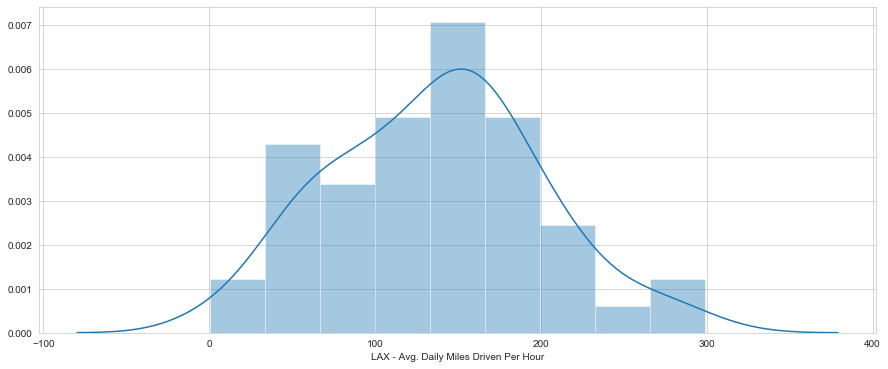

In [20]:
sns.distplot(df_lax_cleaned['LAX - Avg. Daily Miles Driven Per Hour'])

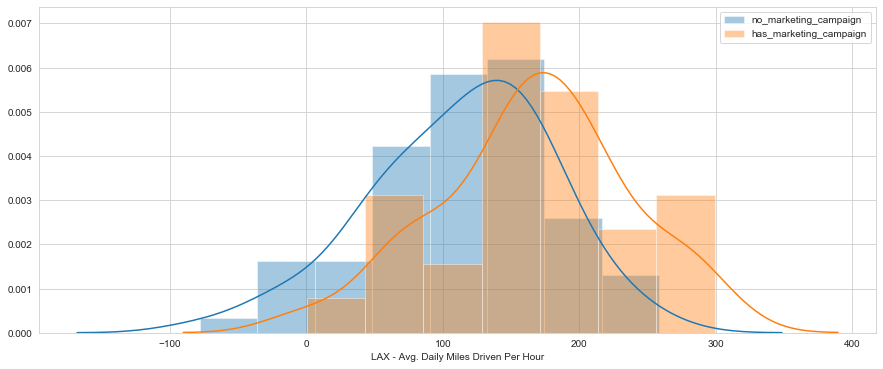

In [21]:
data_lax_0 = df_lax['LAX - Avg. Daily Miles Driven Per Hour'].loc[df_lax['Marketing_Campaign']==0]
data_lax_1 = df_lax['LAX - Avg. Daily Miles Driven Per Hour'].loc[df_lax['Marketing_Campaign']==1]
sns.distplot(data_lax_0)
sns.distplot(data_lax_1)
plt.legend(['no_marketing_campaign','has_marketing_campaign'])

In [22]:
#compare samples
stat, p = f_oneway(data_lax_0, data_lax_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=12.954, p=0.000
Different distributions (reject H0)


# Conclusion
1. Market campaign did not raise the average miles driven per Uber driver in SFO.

2. Market campaign raises the average miles driven per Uber driver in LAX.

3. As the plot showed, the market campaign negatively influence the average miles in SFO. And the hypothesis testing reject H0. This contradictory conclusion can be interpreted as follow: 
We only take one variable("Marketing_Campaign") into consideration to study Uber drivers' average driven mileage. But other factors cannot control by Uber drivers can influence the average driven mileage. For example, the weather and visitors flowrate. When the weather is bad, travelers prefer Uber than public transportation. In this case, Uber drivers' average driving miles will increase. Plus, during the high visitors flowrate period, for example, summer break, Uber drivers' average driving miles will increase. 



